In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind

import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/evareidman/wine_department/main/data/dataset%20after%20eda.csv', sep=',')
df.head()

,Имя,Год,Страна,Сахар,Цена,Рейтинг,Количество отзывов,Наличие отзывов,Ценовая категория,Цена/Рейтинг
0,Вино Chateau Ducru-Beaucaillou,1985,Франция,Сухое,56990.0,5.0,0.0,0,Дорогое,0.282129
1,Вино Chateau Ducru-Beaucaillou,1986,Франция,Сухое,59990.0,5.0,0.0,0,Дорогое,0.297189
2,Вино Chateau Pichon Longueville Comtesse de La...,1995,Франция,Сухое,71490.0,0.0,0.0,0,Дорогое,NaN
3,Вино Chateau Leoville Las Cases,2001,Франция,Сухое,67990.0,0.0,0.0,0,Дорогое,NaN
4,Вино Chateau Calon Segur,2001,Франция,Сухое,39490.0,5.0,1.0,1,Дорогое,0.194277


**Проверим гипотезу о том, что рейтинг дорогих вин в среднем такой же, как и у дешевых и средних на уровне значимости 5%**

$$
H_0: \mu_e - \mu_c = 0 \\
H_1: \mu_e - \mu_c > 0 \\
\alpha = 5\%
$$

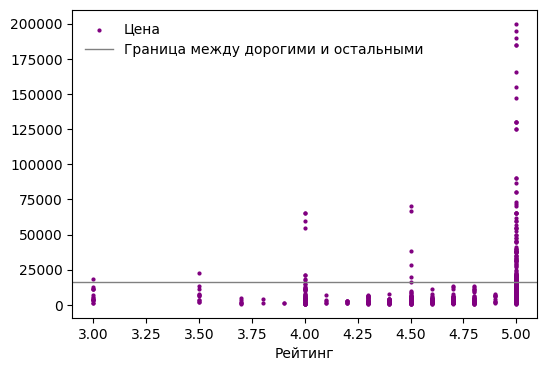

In [139]:
df_price_rate = df[df['Рейтинг'] > 0].dropna(subset=['Рейтинг'])
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df_price_rate['Рейтинг'].dropna(), df_price_rate['Цена'], color='purple', s=4.)
ax.axhline(16000, c='grey', lw=1)
ax.legend(['Цена', 'Граница между дорогими и остальными'], frameon=False)
ax.set_xlabel('Рейтинг');

In [38]:
alpha = 0.05
expensive = df[df['Ценовая категория'] == 'Дорогое']['Цена/Рейтинг'].dropna().values
cheap = df[df['Ценовая категория'].isin(['Дешевое', 'Среднее'])]['Цена/Рейтинг'].dropna().values

In [162]:
mean_e = np.mean(expensive)
mean_c = np.mean(cheap)
var_e = np.var(expensive)
var_c = np.var(cheap)
n = len(expensive)
m = len(cheap)
z_stat = (mean_e - mean_c) / np.sqrt(var_e/n + var_c/m)
z_stat > stats.norm.ppf(1-0.05)


True

можно сделать вывод о статистически значимом положительном различии в рейтинге

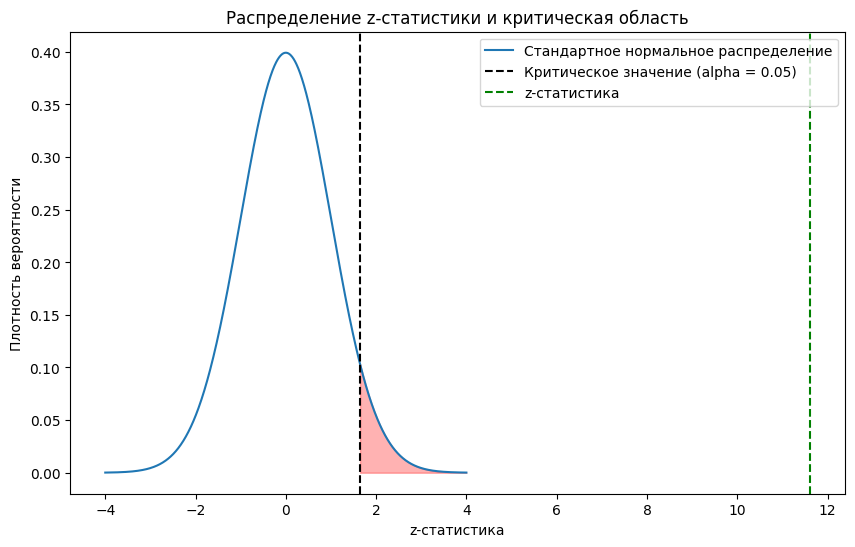

In [163]:
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x)

alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha)
z_values = np.linspace(z_critical, 4, 1000)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Стандартное нормальное распределение')
plt.fill_between(z_values, stats.norm.pdf(z_values), color='red', alpha=0.3)
plt.axvline(z_critical, color='black', linestyle='--', label='Критическое значение (alpha = {})'.format(alpha))
plt.axvline(z_stat, color='green', linestyle='--', label='z-статистика')
plt.xlabel('z-статистика')
plt.ylabel('Плотность вероятности')
plt.title('Распределение z-статистики и критическая область')
plt.legend()
plt.show()


**Проверим гипотезу о том, что мат. ожидание цены старых вин такое же, как и у новых против того, что старые дороже** \
за старые возьмем вина старше 2010 года

$$
H_0: \mu(old) - \mu(new) = 0 \\
H_1: \mu(old) - \mu(new) > 0 \\
\alpha = 5\%
$$

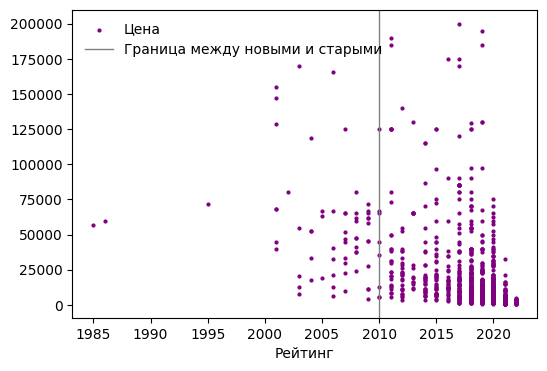

In [136]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df['Год'], df['Цена'], color='purple', s=4.)
ax.axvline(2010, c='grey', lw=1)
ax.legend(['Цена', 'Граница между новыми и старыми'], frameon=False)
ax.set_xlabel('Рейтинг');

In [159]:
old = df[df['Год'] < 2010]['Цена']
new = df[df['Год'] >= 2010]['Цена']

mean_o = np.mean(old)
mean_n = np.mean(new)
var_o = np.var(old)
var_n = np.var(new)
n = len(old)
m = len(new)
z_stat = (mean_o - mean_n) / np.sqrt(var_o/n + var_n/m)
z_stat > stats.norm.ppf(1-0.05)


True

можно отвергнуть нулевую гипотезу и сделать вывод о статистически значимом увеличении средней цены старых вин по сравнению с новыми винами.

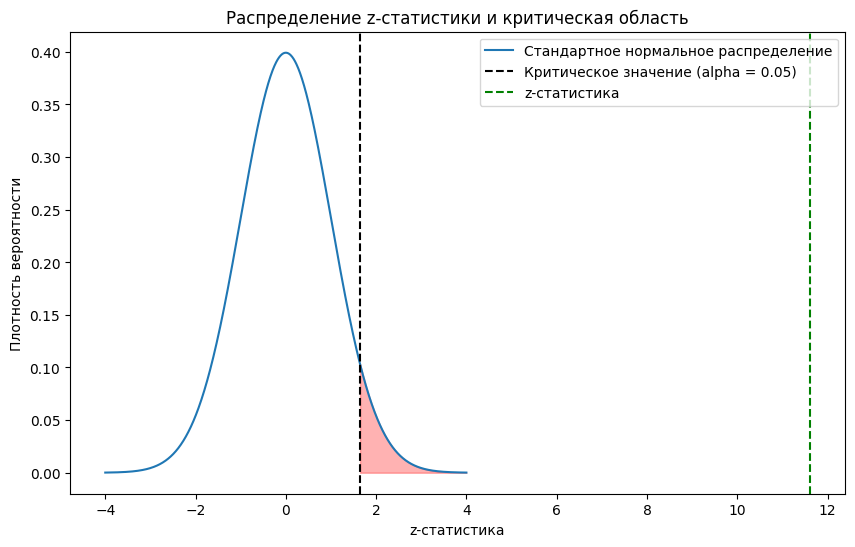

In [165]:
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x)
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha)
z_values = np.linspace(z_critical, 4, 1000)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Стандартное нормальное распределение')
plt.fill_between(z_values, stats.norm.pdf(z_values), color='red', alpha=0.3)
plt.axvline(z_critical, color='black', linestyle='--', label='Критическое значение (alpha = {})'.format(alpha))
plt.axvline(z_stat, color='green', linestyle='--', label='z-статистика')
plt.xlabel('z-статистика')
plt.ylabel('Плотность вероятности')
plt.title('Распределение z-статистики и критическая область')
plt.legend()
plt.show()


**Проверим гипотезу, что мат. ожидание стоимости восточноевропейских вин такое же, как у западноевропейских**

$$
H_0: \mu(west) - \mu(east) = 0 \\
H_1: \mu(west) - \mu(east) > 0 \\
\alpha = 5\%
$$

In [173]:
west = df[df['Страна'].isin(['Франция', 'Италия', 'Испания','Австрия', 'Германия', 'Португалия'])]['Цена']
east = df[df['Страна'].isin([ 'Греция', 'Венгрия', 'Россия', 'Грузия', 'Армения'])]['Цена']

In [174]:
mean_w = np.mean(west)
mean_e = np.mean(east)
var_w = np.var(west)
var_e = np.var(east)
n = len(west)
m = len(east)
z_stat = (mean_w - mean_e) / np.sqrt(var_w/n + var_e/m)
z_stat > stats.norm.ppf(1-0.05)

True

Отвергаем нулевую гипотезу

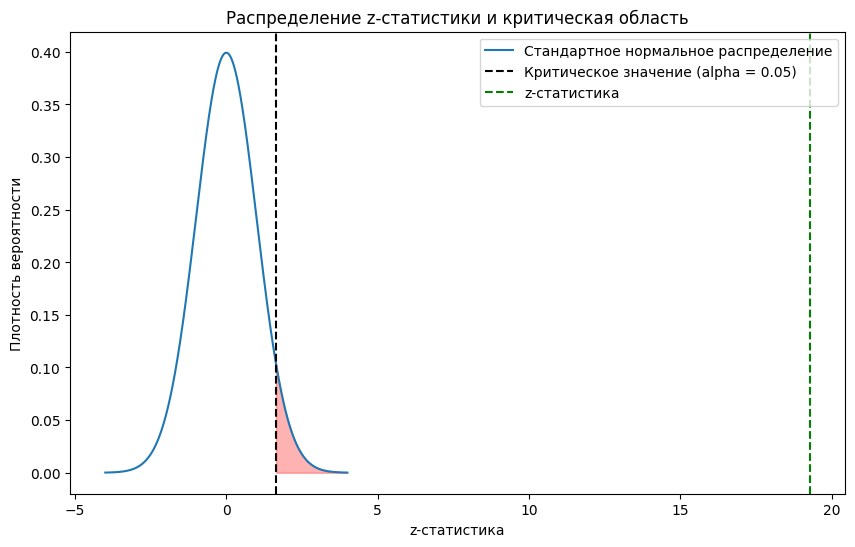

In [175]:
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x)
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha)
z_values = np.linspace(z_critical, 4, 1000)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Стандартное нормальное распределение')
plt.fill_between(z_values, stats.norm.pdf(z_values), color='red', alpha=0.3)
plt.axvline(z_critical, color='black', linestyle='--', label='Критическое значение (alpha = {})'.format(alpha))
plt.axvline(z_stat, color='green', linestyle='--', label='z-статистика')
plt.xlabel('z-статистика')
plt.ylabel('Плотность вероятности')
plt.title('Распределение z-статистики и критическая область')
plt.legend(loc='upper right')
plt.show()

**Проверим гипотезу, что мат. ожидание рейтинга вин стран старого света такое же, как у вин стран нового света**


$$
H_0: \mu(old) - \mu(new) = 0 \\
H_1: \mu(old) - \mu(new) > 0 \\
\alpha = 5\%
$$


In [176]:
df['Страна'].value_counts()

Франция                      546
Италия                       309
Испания                       54
Чили                          28
Австралия                     26
Соединенные Штаты Америки     22
Россия                        20
Австрия                       18
Германия                      17
Южная Африка                  16
Грузия                         9
Аргентина                      7
Армения                        4
Новая Зеландия                 2
Греция                         2
Португалия                     1
Венгрия                        1
Name: Страна, dtype: int64

In [177]:

old = df[df['Страна'].isin(['Франция', 'Италия', 'Испания', 'Португалия', 'Греция'])]['Рейтинг'].dropna()
new = df[df['Страна'].isin(['Чили', 'Австралия', 'Соединенные Штаты Америки', 'Аргентина', 'Новая Зеландия'])]['Рейтинг'].dropna()

mean_o = np.mean(old)
mean_n = np.mean(new)
var_o = np.var(old)
var_n = np.var(new)
n = len(old)
m = len(new)
z_stat = (mean_o - mean_n) / np.sqrt(var_o/n + var_n/m)
z_stat > stats.norm.ppf(1-0.05)

False

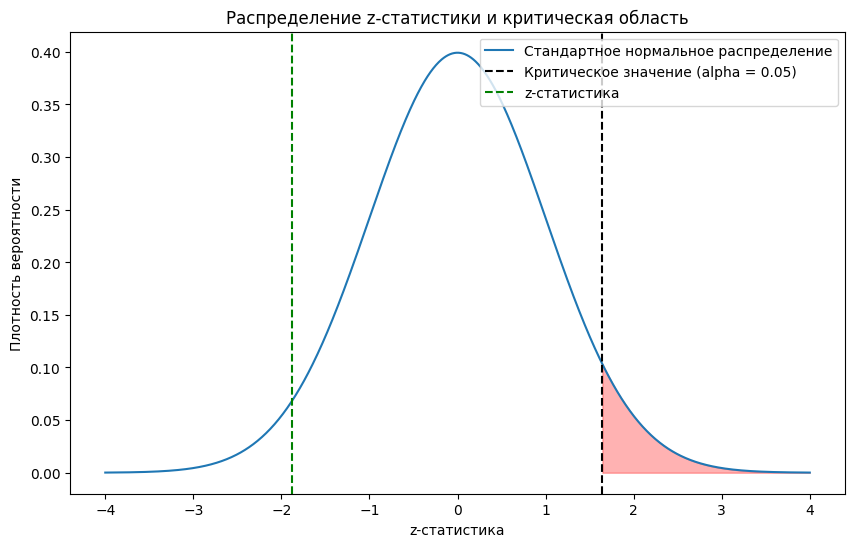

In [178]:
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x)
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha)
z_values = np.linspace(z_critical, 4, 1000)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Стандартное нормальное распределение')
plt.fill_between(z_values, stats.norm.pdf(z_values), color='red', alpha=0.3)
plt.axvline(z_critical, color='black', linestyle='--', label='Критическое значение (alpha = {})'.format(alpha))
plt.axvline(z_stat, color='green', linestyle='--', label='z-статистика')
plt.xlabel('z-статистика')
plt.ylabel('Плотность вероятности')
plt.title('Распределение z-статистики и критическая область')
plt.legend(loc='upper right')
plt.show()

Не отвергаем нулевую гипотезу

**Проверим гипотезу о том, что доля Франции на российском рынке такая же как у остальных стран в сумме**

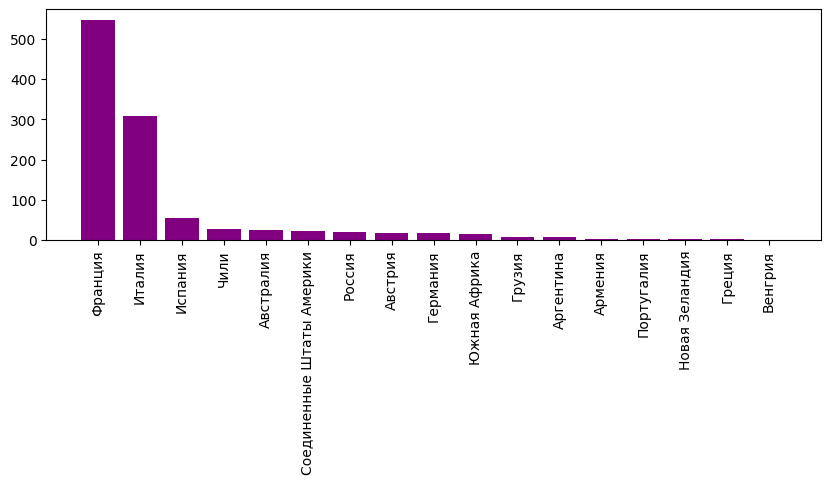

In [80]:
fig, ax = plt.subplots(figsize=(10, 3))
ax.bar(df['Страна'].value_counts().index, df['Страна'].value_counts(), color='purple')
plt.xticks(rotation=90);


$$
H_0: p(France) - p(other) = 0 \\
H_1: p(France) - p(other) \not= 0 \\
\alpha = 5\%
$$


In [180]:
france = df[(df['Страна']=='Франция')].dropna().shape[0]

other = df[df['Страна'] !='Франция'].dropna().shape[0]

expected_proportion = 0.5

z_stat, p_value = proportions_ztest(france, other, expected_proportion)

z_stat > stats.norm.ppf(1-0.05)


True

можно отвергнуть нулевую гипотезу о равенстве долей

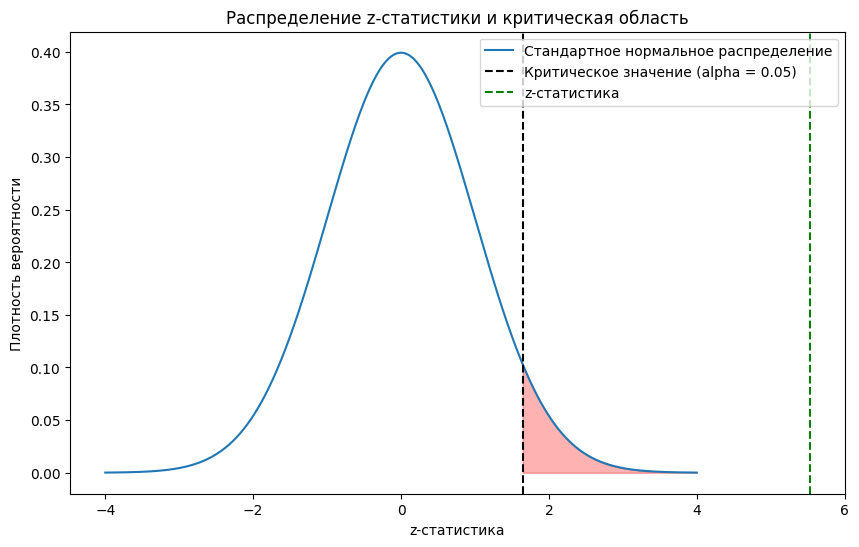

In [181]:
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x)
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha)
z_values = np.linspace(z_critical, 4, 1000)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Стандартное нормальное распределение')
plt.fill_between(z_values, stats.norm.pdf(z_values), color='red', alpha=0.3)
plt.axvline(z_critical, color='black', linestyle='--', label='Критическое значение (alpha = {})'.format(alpha))
plt.axvline(z_stat, color='green', linestyle='--', label='z-статистика')
plt.xlabel('z-статистика')
plt.ylabel('Плотность вероятности')
plt.title('Распределение z-статистики и критическая область')
plt.legend(loc='upper right')
plt.show()

**Примечание:** \
во всех гипотезах кроме последней мы использовали данную формулу из файла Слаболицкого

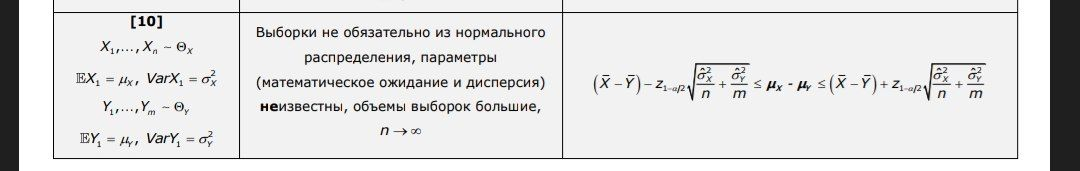